In [1]:
import numpy as np
import pandas as pd
from arch import arch_model
import math
from datetime import datetime as dt
from matplotlib import pyplot
import statsmodels.formula.api as sm
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
#import data file
data=pd.read_excel('Downloads\RV.xlsx')
data['Date']=pd.to_datetime(data.Date)
data.set_index('Date',inplace=True)
data.tail()

,Symbol,R,RV
Date,,,
2018-02-05,.STOXX50E,-1.084834,1.284597
2018-02-06,.STOXX50E,-0.655623,5.328114
2018-02-07,.STOXX50E,1.394533,0.955107
2018-02-08,.STOXX50E,-2.126916,0.954347
2018-02-09,.STOXX50E,-1.768411,2.318103


In [3]:
#Select the first index AEX. Sub-period January 2000 – December 2012
AEX=data.loc[data['Symbol']=='.AEX']

In [4]:
data1=AEX[AEX.index<"2013-01-01"]
data2=AEX[AEX.index>="2013-01-01"]
data1.head()

,Symbol,R,RV
Date,,,
2000-01-03,.AEX,-0.034046,1.301702
2000-01-04,.AEX,-3.360567,2.013057
2000-01-05,.AEX,-0.167499,4.909661
2000-01-06,.AEX,-1.313013,2.251396
2000-01-07,.AEX,2.501328,1.384146


Iteration:      1,   Func. Count:      7,   Neg. LLF: 4648.878389354795
Iteration:      2,   Func. Count:     18,   Neg. LLF: 4648.763840222367
Iteration:      3,   Func. Count:     28,   Neg. LLF: 4648.215442301514
Iteration:      4,   Func. Count:     36,   Neg. LLF: 4644.894302057531
Iteration:      5,   Func. Count:     44,   Neg. LLF: 4640.709497057852
Iteration:      6,   Func. Count:     52,   Neg. LLF: 4638.839210075199
Iteration:      7,   Func. Count:     60,   Neg. LLF: 4636.015602657494
Iteration:      8,   Func. Count:     67,   Neg. LLF: 4635.259598063447
Iteration:      9,   Func. Count:     74,   Neg. LLF: 4634.223458121536
Iteration:     10,   Func. Count:     82,   Neg. LLF: 4633.8307165924925
Iteration:     11,   Func. Count:     89,   Neg. LLF: 4633.5138725868765
Iteration:     12,   Func. Count:     96,   Neg. LLF: 4633.506390859911
Iteration:     13,   Func. Count:    103,   Neg. LLF: 4633.506023684082
Iteration:     14,   Func. Count:    110,   Neg. LLF: 4633.506

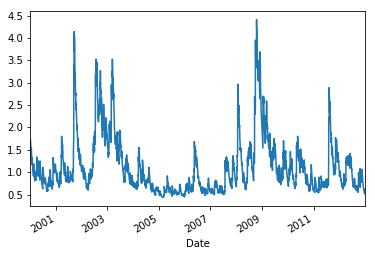

In [5]:
#Testing Garch 
R=data1['R']
am=arch_model(R,p=1,o=1,q=1)
res=am.fit()
print(res.summary())
sigma=res.conditional_volatility
sigma.plot()

In [6]:
#Garch vs EWMA Forecasting 

#Garch parameters
omega=res.params['omega']
alpha=res.params['alpha[1]']
beta=res.params['beta[1]']
gamma=res.params['gamma[1]']

In [8]:
#Creat forecasting time frame
data2['sig']=np.nan
df=data2.copy()
df=df.drop(['Symbol','R','RV'],axis=1)

C:\Users\sunju\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [33]:
#make a full period of dataframe[sigma]
data2['sig']=np.nan
df=data2.copy()
df=df.drop(['Symbol','R','RV'],axis=1)
sig=sigma.append(df.sig)
data2=data2.drop(['sig'],axis=1)

AEX['I']=0
print(sig)

Date
2000-01-03    1.293063
2000-01-04    1.242102
2000-01-05    1.745607
2000-01-06    1.674356
2000-01-07    1.678797
2000-01-10    1.609801
2000-01-11    1.543988
2000-01-12    1.553024
2000-01-13    1.514095
2000-01-14    1.452723
2000-01-17    1.394217
2000-01-18    1.338461
2000-01-19    1.531234
2000-01-20    1.471191
2000-01-21    1.411822
2000-01-24    1.357586
2000-01-25    1.303559
2000-01-26    1.253698
2000-01-27    1.243636
2000-01-28    1.207620
2000-01-31    1.175757
2000-02-01    1.315867
2000-02-02    1.264616
2000-02-03    1.215014
2000-02-04    1.167795
2000-02-07    1.122864
2000-02-08    1.164088
2000-02-09    1.119337
2000-02-10    1.078068
2000-02-11    1.040980
                ...   
2017-12-29         NaN
2018-01-02         NaN
2018-01-03         NaN
2018-01-04         NaN
2018-01-05         NaN
2018-01-08         NaN
2018-01-09         NaN
2018-01-10         NaN
2018-01-11         NaN
2018-01-12         NaN
2018-01-15         NaN
2018-01-16         NaN
2018-0

C:\Users\sunju\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


C:\Users\sunju\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


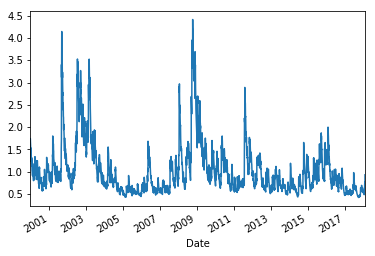

In [35]:
##garch equation
for i in range(len(data1),len(sig)):
    if AEX['R'][i]<0:
        AEX.loc[AEX.index[i],'I']=1
    sig.loc[sig.index[i]]=np.sqrt(omega +AEX.I.loc[AEX.index[i-1]]*gamma*AEX.R.loc[AEX.index[i-1]]**2 +alpha* AEX.R.loc[AEX.index[i-1]]**2 + sig.loc[sig.index[i-1]]**2 *beta)
sig.plot()

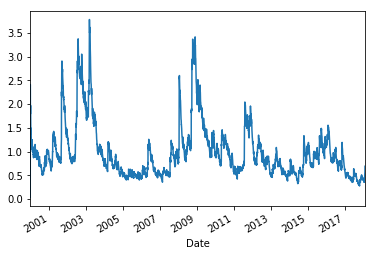

In [36]:
#EWMA Forecast

#Moving average series
labda = 0.94
Rsq = (AEX['R']**2).shift(1)
Esigma2 = Rsq.ewm(alpha=1-labda).mean()
Esigma = np.sqrt(Esigma2)
Esigma.plot()

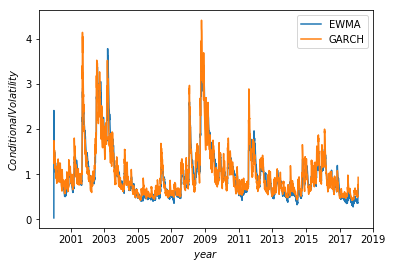

In [37]:
plt.plot(Esigma)
plt.plot(sig)
plt.xlabel('$year$')
plt.ylabel('$Conditional Volatility$')
plt.legend(["EWMA","GARCH"])

The plots show a very similar trend. Despite EWMA forecasting is lower or higher at some point than GARCH method. Overall they are the same.

In [38]:
#Evaluate 2 series of forecasted variance by running linear regression.


#Using data only from the post-sample period January 2013 – February 2018
RV=data2['RV']
##Regression on garch variance
# define X Y
x=sig.loc['2013-1-01':'2018-02-09']**2
x = sm.add_constant(x)
y=RV
modelGAR = sm.OLS(y,x)
result_GAR = modelGAR.fit()
print(result_GAR.summary())

                            OLS Regression Results                            
Dep. Variable:                     RV   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     425.4
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           4.89e-82
Time:                        16:00:45   Log-Likelihood:                -1640.9
No. Observations:                1307   AIC:                             3286.
Df Residuals:                    1305   BIC:                             3296.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0245      0.037      0.655      0.5

C:\Users\sunju\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


From the table we can see that garch variance has a positive impact on RV. One percentage point more in variance forecasted would increase RV by 0.9384 percentage point. However, the coefficient is not significant. 

In [39]:
#REGRESS ON EWMA VARIANCE
X=Esigma2.loc['2013-1-01':'2018-02-09']
X=sm.add_constant(X)
modelEWMA = sm.OLS(y,X)
result_EWMA= modelEWMA.fit()
print(result_EWMA.summary())


                            OLS Regression Results                            
Dep. Variable:                     RV   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     321.8
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           1.69e-64
Time:                        16:00:48   Log-Likelihood:                -1681.2
No. Observations:                1307   AIC:                             3366.
Df Residuals:                    1305   BIC:                             3377.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0453      0.040      1.121      0.2

C:\Users\sunju\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


We can also see a positive impact of variance on RV, yet it is not significant. Comparing two regression results, Garch has a slightly higher R-squared, which means the model fits more than EWMA did.

In [40]:
#Testing hypothesis
#b0=0,b1=1 in garch reg
r = np.zeros_like(result_GAR.params)
r=[[1,0],[0,1]]
ttest=result_GAR.t_test(r)
print(ttest)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0245      0.037      0.655      0.513      -0.049       0.098
c1             0.8486      0.041     20.626      0.000       0.768       0.929


In the t test of garch variables, the p values are both out of the confident intervals. So we dont have enough evidence to reject the null hypotheses. Not enough evident to prove that b0 is not equal to 0 and b1 is not equal to 1.

In [22]:
#b0=0, b1=1 in EMWA reg
H='const=0,R=1'
result_EWMA.t_test(H)

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0453      0.040      1.121      0.263      -0.034       0.125
c1             0.9688      0.054     -0.577      0.564       0.863       1.075

In these two t tests using EWMA variables, null hypotheses are both rejected. so there are enough evidence to say that b0 not equal to 0 and b1 not equal to 1.